In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  lsd.csv

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4
SCORE: Math Score          8-12


In [35]:
# Read the csv file into a pandas DataFrame
lsd = pd.read_csv('../Resources/lsd.csv')
lsd.head()

,tc,score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [36]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this
# print(lsd.tc)
# print(type(lsd.tc.values))
print(lsd.tc.values.reshape(-1,1))

X = lsd.tc.values.reshape(-1, 1)
y = lsd.score.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

[[1.17]
 [2.97]
 [3.26]
 [4.69]
 [5.83]
 [6.  ]
 [6.41]]
Shape:  (7, 1) (7, 1)


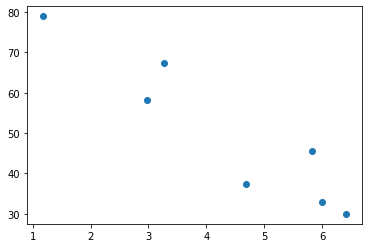

In [37]:
# Plot the data
plt.scatter(X, y)

In [38]:
# Create the model and fit the model to the data
from sklearn.linear_model import LinearRegression
fit = LinearRegression().fit(X,y)

In [39]:
print(f'Coefficient: {fit.coef_[0][0]}')
print(f'y-intercept: {fit.intercept_[0]}')

Coefficient: -9.009466415296785
y-intercept: 89.12387376799308


In [64]:
X_first = X[0].reshape(-1, 1)
X_last = X[-1].reshape(-1, 1)
print(f'First LSD concentration value: {X_min[0][0]}')
print(f'Last LSD concentration value: {X_max[0][0]}')
print()
y_first_predict = fit.predict(X_first)
y_first = y[0].reshape(-1, 1)
y_last_predict = fit.predict(X_last)
y_last = y[-1].reshape(-1, 1)

print(f'Test score for first concentration value: {y_first[0][0]}')
print(f'Predicted test score for first concentration value: {y_first_predict[0][0]}')
print()
print(f'Test score for last concentration value: {y_last[0][0]}')
print(f'Predicted test score for last concentration value: {y_last_predict[0][0]}')


First LSD concentration value: 1.17
Last LSD concentration value: 6.41

Test score for first concentration value: 78.93
Predicted test score for first concentration value: 78.58279806209583

Test score for last concentration value: 29.97
Predicted test score for last concentration value: 31.37319404594068


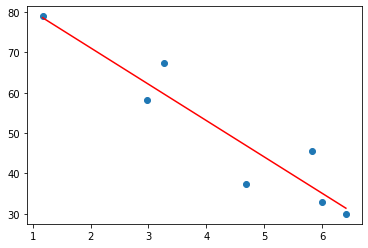

In [49]:
plt.scatter(X, y)
plt.plot([X_first[0][0], X_last[0][0]], [y_first_predict[0][0], y_last_predict[0][0]], color='red')

In [63]:
lsd = input("Provide an LSD concentration: ")
lsd = np.array(float(lsd)).reshape(-1, 1)

output = fit.predict(lsd)
print(f'We predict a test score of: {output[0][0]}')

Provide an LSD concentration: 0.29
We predict a test score of: 86.511128507557
